<a href="https://colab.research.google.com/github/md6184/CSE_4102/blob/main/student_examination_lsm_84_68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('/content/student_exam_scores.csv')
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [5]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [6]:
miss_values = df.isnull().sum()

if any(miss_values > 0):
    print(missing_values[missing_values > 0])
else:
    print("No missing values found")

No missing values found


In [7]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [8]:
df.columns

Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')

<Figure size 800x400 with 0 Axes>

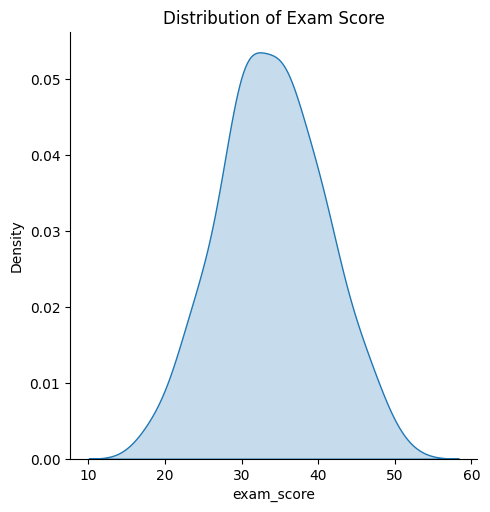

In [9]:
plt.figure(figsize=(8, 4))
sns.displot(df, x='exam_score', kind='kde', fill=True)
plt.title("Distribution of Exam Score")
plt.show()

<Figure size 800x400 with 0 Axes>

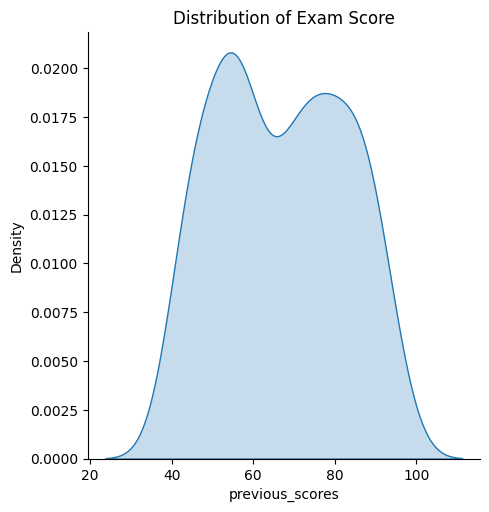

In [10]:
plt.figure(figsize=(8, 4))
sns.displot(df, x='previous_scores', kind='kde', fill=True)
plt.title("Distribution of Exam Score")
plt.show()

<Figure size 800x400 with 0 Axes>

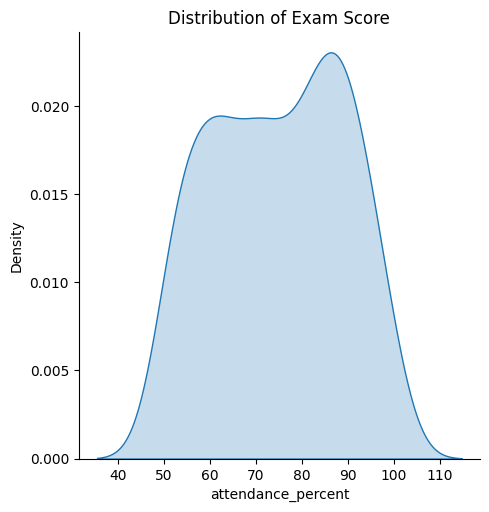

In [11]:
plt.figure(figsize=(8, 4))
sns.displot(df, x='attendance_percent', kind='kde', fill=True)
plt.title("Distribution of Exam Score")
plt.show()

<Figure size 800x400 with 0 Axes>

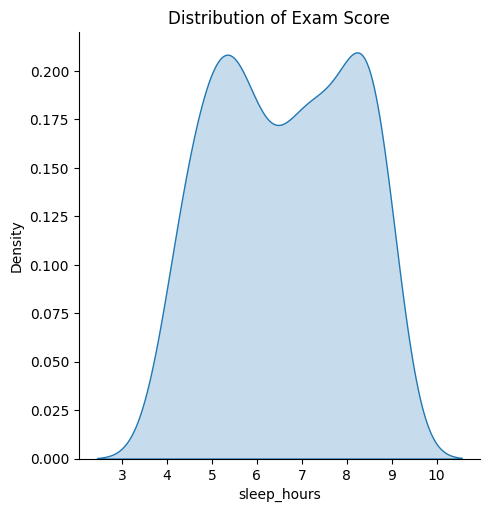

In [12]:
plt.figure(figsize=(8, 4))
sns.displot(df, x='sleep_hours', kind='kde', fill=True)
plt.title("Distribution of Exam Score")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=(['student_id', 'exam_score']))
y = df['exam_score']

In [14]:
class LSM:
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        XT_X_inv = np.linalg.inv(X.T @ X)
        weights = np.linalg.multi_dot([XT_X_inv, X.T, y])
        self.bias, self.weights = weights[0], weights[1:]

    def predict(self, X_test):
        return X_test @ self.weights + self.bias

$$\begin{align*}
J(w, X, y) &= \frac{1}{2n} \sum_{i=1}^{n} (w^T x_i - y_i)^2 = \frac{1}{2n} \|Xw - y\|^2 = \frac{1}{2n} (Xw - y)^T (Xw - y) \\
&= \frac{1}{2n} \left( (Xw)^T Xw - (Xw)^T y - y^T Xw + y^T y \right) = \frac{1}{2n} \left( w^T X^T X w - 2 y^T X w + y^T y \right) \\
\\
\frac{\partial J}{\partial w} &= 0 \quad \Rightarrow \quad \frac{1}{2n} (2 X^T X w - 2 X^T y) = 0 \quad \Rightarrow \quad X^T X w = X^T y \\
&\Rightarrow \quad w = (X^T X)^{-1} X^T y
\end{align*}$$

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [16]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LSM())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [17]:
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred) * 100

In [18]:
print(f"MSE = {MSE}")
print(f"R2 = {R2}")

MSE = 8.196816521573838
R2 = 84.68235970523799
